<a href="https://colab.research.google.com/github/Auvarmf/Riset-MBKM-CNN2023/blob/main/Model_Selection_Lanjutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
from google.colab import drive
from keras.layers import GlobalAveragePooling2D
from keras.layers import Input, Dense, Conv2D, Activation, MaxPooling2D, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import accuracy_score

In [76]:
# Mount Google Drive untuk mengakses file dan folder
drive.mount('MBKMCNN')

Drive already mounted at MBKMCNN; to attempt to forcibly remount, call drive.mount("MBKMCNN", force_remount=True).


In [77]:
class_names = {'dita', 'nadaa'}

class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)

IMAGE_SIZE = (224, 224)

{'dita': 0, 'nadaa': 1}


In [78]:
def load_data():
  DIRECTORY = r'/content/MBKMCNN/MyDrive/MBKMCNN/model_selection_lanjutan'
  CATEGORY = ['train', 'validation']

  output = []

  for category in CATEGORY:
    path = os.path.join(DIRECTORY, category)
    print(path)
    images = []
    labels = []

    print("Loading {}".format(category))

    for folder in os.listdir(path):
      label = class_names_label[folder]

      for file in os.listdir(os.path.join(path, folder)):
        img_path = os.path.join(os.path.join(path, folder), file)

        image = cv2.imread(img_path)
        image = cv2.resize(image, IMAGE_SIZE)

        images.append(image)
        labels.append(label)

    images = np.array(images, dtype="float32")
    labels = np.array(labels, dtype="int32")

    output.append((images, labels))

  return output

In [79]:
(train_images, train_labels), (test_images, test_labels) = load_data()

/content/MBKMCNN/MyDrive/MBKMCNN/model_selection_lanjutan/train
Loading train
/content/MBKMCNN/MyDrive/MBKMCNN/model_selection_lanjutan/validation
Loading validation


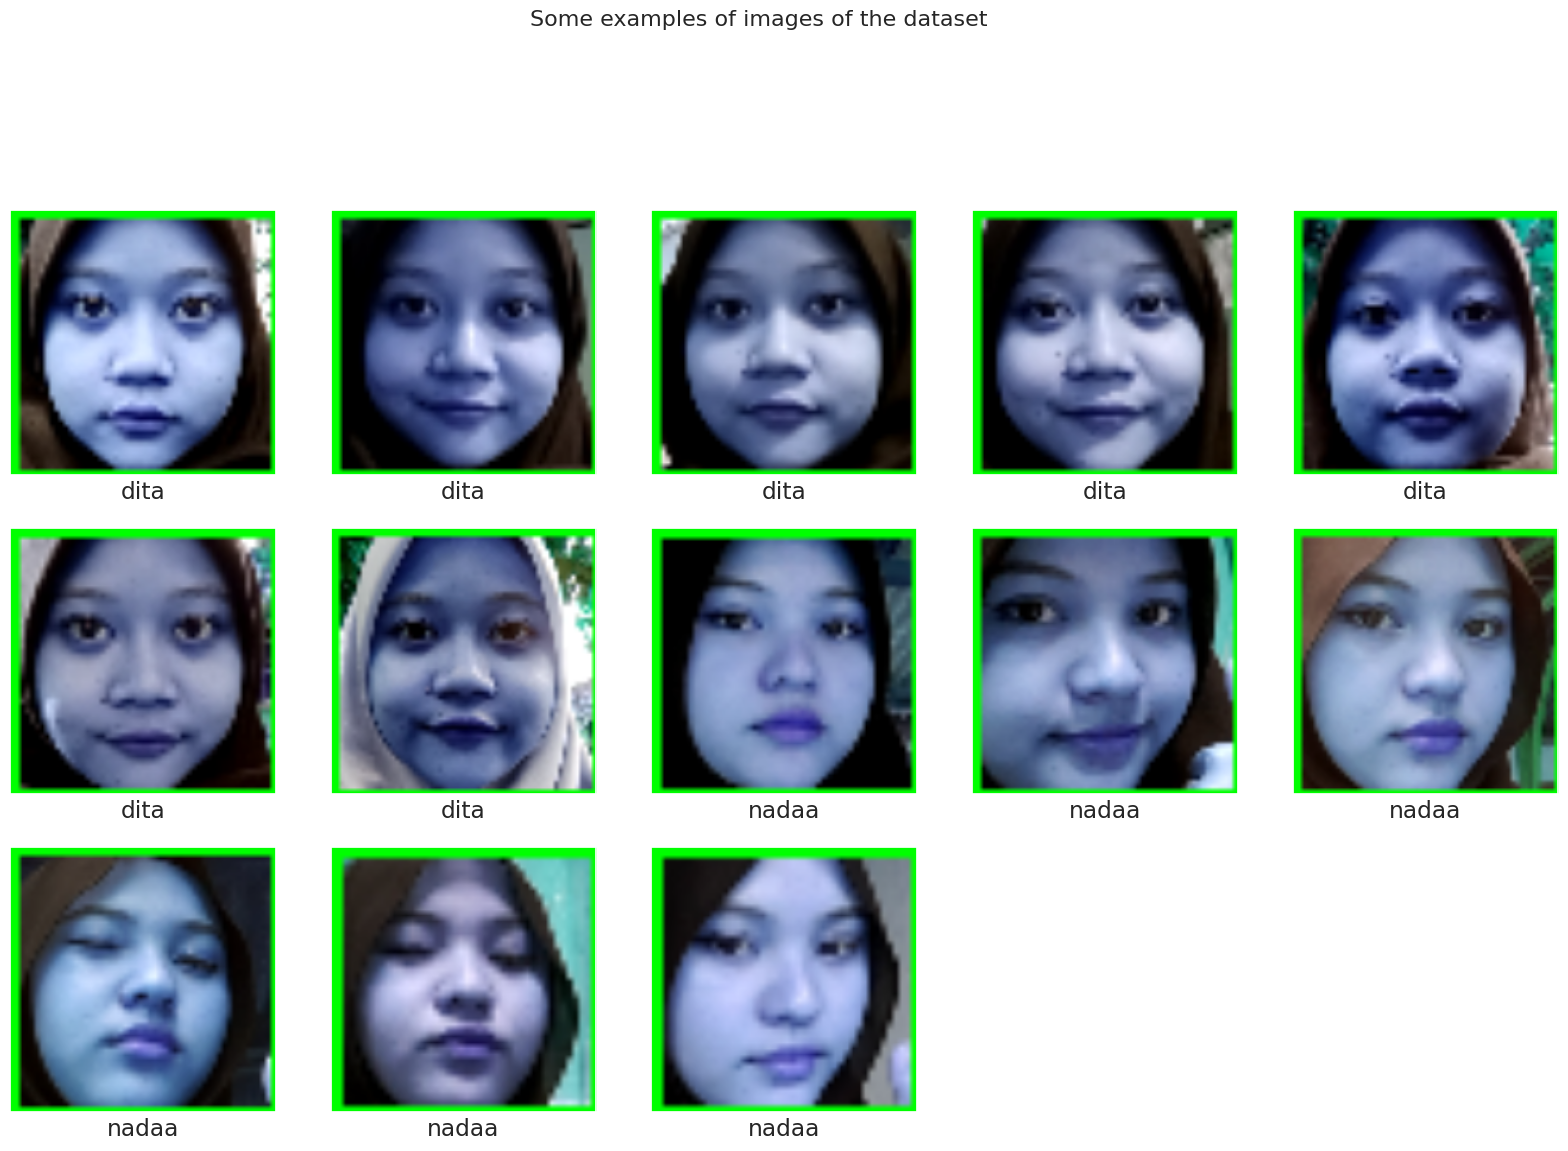

In [80]:
def display_examples(class_names, images, labels):
    if len(images) == 0:
        print("No images to display.")
        return

    class_names_list = list(class_names)

    figsize = (20, 20)
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Some examples of images of the dataset", fontsize=16)

    num_images_to_display = min(len(images), 25)
    for i in range(num_images_to_display):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        resized_image = cv2.resize(images[i], (224, 224))
        plt.imshow(resized_image.astype(np.uint8))
        plt.xlabel(class_names_list[labels[i]])

    plt.show()

display_examples(class_names, train_images, train_labels)

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(6, activation = tf.nn.softmax),
])

In [82]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=4, validation_split=0.2)

Epoch 1/4
1/1 [==============================] - 5s 5s/step - loss: 72.3262 - accuracy: 0.0000e+00 - val_loss: 772.2889 - val_accuracy: 0.0000e+00
Epoch 2/4
1/1 [==============================] - 1s 771ms/step - loss: 212.6074 - accuracy: 0.7000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/4
1/1 [==============================] - 1s 729ms/step - loss: 475.7262 - accuracy: 0.3000 - val_loss: 1.9397 - val_accuracy: 0.6667
Epoch 4/4
1/1 [==============================] - 1s 727ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 334.6385 - val_accuracy: 0.0000e+00


In [84]:
def plot_accuracy_loss(history):
  fig = plt.figure(figsize=(10,5))

  plt.subplot(221)
  plt.plot(history.history['accuracy'], 'bo--', label = 'acc')
  plt.plot(history.history['val_accuracy'], 'ro--', label = 'val_acc')
  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.subplot(222)
  plt.plot(history.history['loss'], 'bo--', label = 'loss')
  plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")

  plt.legend()
  plt.show()

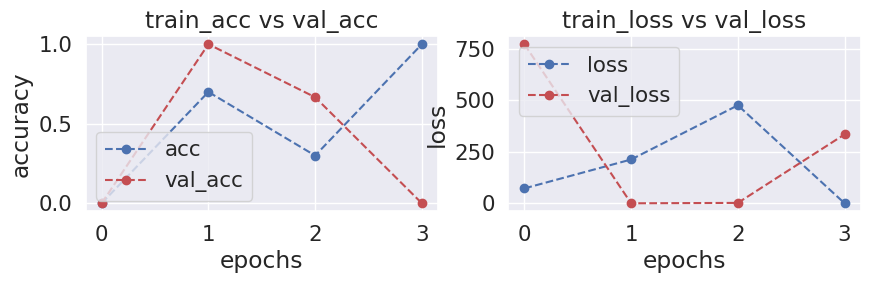

In [85]:
plot_accuracy_loss(history)

In [86]:
test_loss = model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 185ms/step - loss: 124.6455 - accuracy: 0.5000


In [87]:
prediction = model.predict(test_images)
pred_labels = np.argmax(prediction, axis = 1)
print(classification_report(test_labels, pred_labels, zero_division=1))

1/1 [==============================] - 0s 253ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.75      0.50      0.33         6
weighted avg       0.75      0.50      0.33         6



In [98]:
# using VGG16
model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

# Preprocess the images
train_images_preprocessed = preprocess_input(train_images)
test_images_preprocessed = preprocess_input(test_images)

553467096/553467096 [==============================] - 8s 0us/step


In [99]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
# Train the model
history = model.fit(train_images_preprocessed, train_labels, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 32s 32s/step - loss: 12.6976 - accuracy: 0.0000e+00 - val_loss: 324.9192 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 27s 27s/step - loss: 94.5499 - accuracy: 0.7000 - val_loss: 1.9868e-07 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 25s 25s/step - loss: 13.7377 - accuracy: 0.3000 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 27s 27s/step - loss: 6.1541 - accuracy: 0.3000 - val_loss: 10.2313 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 26s 26s/step - loss: 3.2263 - accuracy: 0.7000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 28s 28s/step - loss: 500.1751 - accuracy: 0.3000 - val_loss: 5.7691 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 25s 25s/step - loss: 4.6667 - accuracy: 0.7000 - val_loss: 1.6691 - val_accuracy: 0.

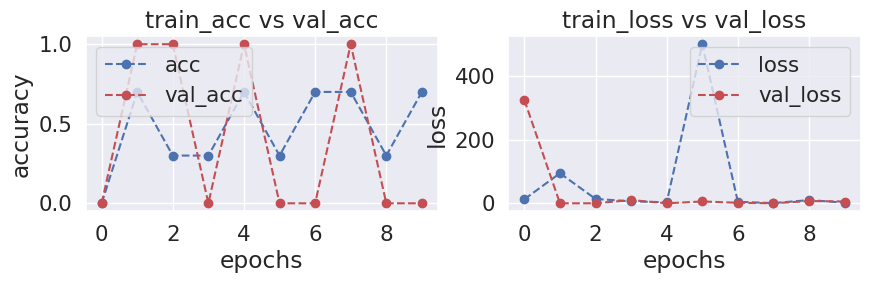

In [101]:
plot_accuracy_loss(history)

In [103]:
predictions = model.predict(test_images_preprocessed)
pred_labels = np.argmax(predictions, axis=1)
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

1/1 [==============================] - 7s 7s/step
Accuracy : 0.5


In [104]:
print(classification_report(test_labels, pred_labels, zero_division=1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.75      0.50      0.33         6
weighted avg       0.75      0.50      0.33         6

